In [2]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

# Question 1

Consider a plant P=1/(s^2+2s+10). Consider a proportional controller P=30. 

1. What are the closed loop poles?
2. What is the steady state error to a step input of the closed loop system?
3. Add derivative action with Kd = 30. What are the closed loop poles?
4. Which direction did the closed loop poles move in the s-plane?
5. Is this movement consistent with the idea that derivative action reduces oscillations in the step response of a closed loop system?
6. What did adding derivative action do to the robustness of the closed loop system?
7. What is the steady state error to a step input of the closed loop system with a PD controller?

[-1.+3.j -1.-3.j]
S1:

s^2 + 2 s + 10
--------------
s^2 + 2 s + 40

[-1.+6.244998j -1.-6.244998j]

S2:

s^2 + 2 s + 10
---------------
s^2 + 32 s + 40

[-30.69693846+0.j  -1.30306154+0.j]


Text(0.5, 0, 'Time (s)')

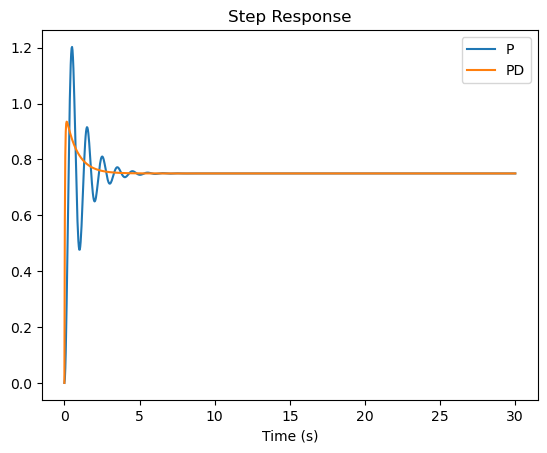

In [3]:
Kd = 30
Kp = 30
Ki = 30
P = ct.tf([1], [1, 2, 10])

K1 = ct.tf([Kp], [1])
T1 = P*K1/(1+P*K1)
S1 = 1/(1+P*K1)

K2 = ct.tf([Kd, Kp],[1])
T2 = P*K2/(1+P*K2)
S2 = 1/(1+P*K2)

N = 1000
t = np.linspace(0,30,N)
t,y1 = ct.step_response(T1,T=t)

t,y2 = ct.step_response(T2,T=t)

#t,y3 = ct.step_response(T3,T=t)

print(ct.poles(P))

print('S1:')
print(S1)
print(ct.poles(S1))

print('\nS2:')
print(S2)
print(ct.poles(S2))

fig,ax=plt.subplots(1)
ax.plot(t,y1,label='P')
ax.plot(t,y2,label='PD')
ax.legend()
ax.set_title('Step Response')
ax.set_xlabel('Time (s)')

# Look at Bode Plots to determine robustness

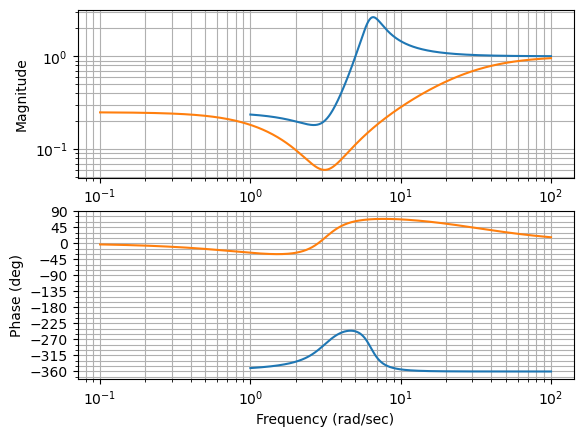

In [4]:
out=ct.bode_plot(S1)
out=ct.bode_plot(S2)

# Question 2

Consider the same plant P=1/(s^2+2s+10). Consider a proportional controller P=30. 

1. Add integral action with Ki = 30. What are the closed loop poles?
2. Which direction did the closed loop poles move in the s-plane?
3. Is this movement consistent with the idea that integral action increases oscillations and overshoot and settling time in the step response of a closed loop system?
4. What did adding integral action do to the robustness of the closed loop system?
5. What is the steady state error to a step input of the closed loop system with a PI controller?

[-1.+3.j -1.-3.j]
S1:

s^2 + 2 s + 10
--------------
s^2 + 2 s + 40

[-1.+6.244998j -1.-6.244998j]

S3:

  s^3 + 2 s^2 + 10 s
-----------------------
s^3 + 2 s^2 + 40 s + 30

[-0.61591391+6.21887403j -0.61591391-6.21887403j -0.76817219+0.j        ]


Text(0.5, 0, 'Time (s)')

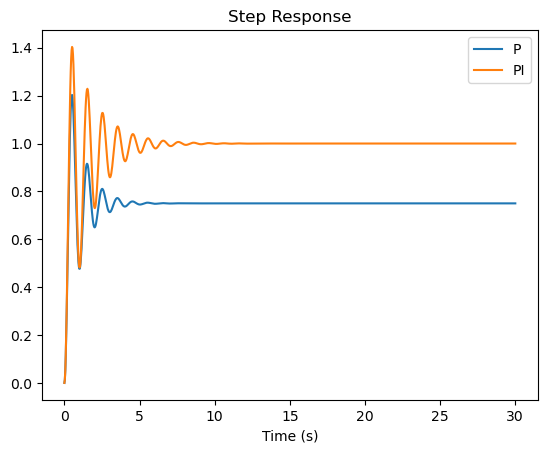

In [53]:
Kp = 30
Ki = 30
P = ct.tf([1], [1, 2, 10])

K3 = ct.tf([Kp, Ki], [1, 0])
T3 = P*K3/(1+P*K3)
S3 = 1/(1+P*K3)

t,y3 = ct.step_response(T3,T=t)

print(ct.poles(P))

print('S1:')
print(S1)
print(ct.poles(S1))

print('\nS3:')
print(S3)
print(ct.poles(S3))

fig,ax=plt.subplots(1)
ax.plot(t,y1,label='P')
ax.plot(t,y3,label='PI')
ax.legend()
ax.set_title('Step Response')
ax.set_xlabel('Time (s)')

In [57]:
# Percent Overshoot
print('Percent overshoot with proportional control:')
print(100*np.exp(-1/6.2*np.pi))
print('Percent overshoot with PI control:')
print(100*np.exp(-0.6/6.2*np.pi))

Percent overshoot with proportional control:
60.247537096787084
Percent overshoot with PI control:
73.78423496891502


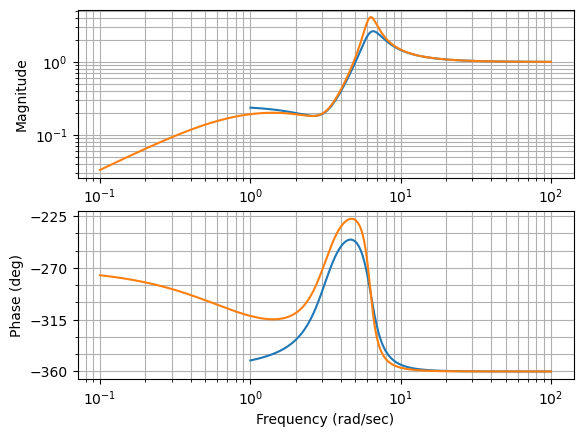

In [54]:
out=ct.bode_plot(S1)
out=ct.bode_plot(S3)